In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [15]:
# Read file
icfes = pd.read_csv("./data/ICFES/icfes.csv", low_memory=False, encoding="utf-8")

print(icfes.shape)
print(len(icfes))
icfes.head()

(559253, 79)
559253


,COLE_AREA_UBICACION,COLE_BILINGUE,COLE_CALENDARIO,COLE_CARACTER,COLE_DEPTO_UBICACION,COLE_GENERO,COLE_JORNADA,COLE_MCPIO_UBICACION,COLE_NATURALEZA,COLE_NOMBRE_ESTABLECIMIENTO,...,PERCENTIL_LECTURA_CRITICA,PERCENTIL_MATEMATICAS,PERCENTIL_SOCIALES_CIUDADANAS,PERIODO,PUNT_C_NATURALES,PUNT_GLOBAL,PUNT_INGLES,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_SOCIALES_CIUDADANAS
0,URBANO,N,B,TÉCNICO/ACADÉMICO,VALLE,MIXTO,NaN,CALI,NO OFICIAL,COLEGIO PARROQIAL SANTIAGO APOSTOL,...,15,4,1,20171,35,177,45,44,31,28
1,URBANO,NaN,B,NaN,CAUCA,MIXTO,NaN,POPAYAN,NO OFICIAL,COLEGIO CESCO BILINGÜE,...,78,62,85,20171,66,326,55,67,61,70
2,URBANO,S,B,ACADÉMICO,VALLE,MIXTO,NaN,CALI,NO OFICIAL,COL BOLIVAR,...,91,99,76,20171,70,378,100,72,86,66
3,URBANO,S,B,ACADÉMICO,VALLE,MIXTO,NaN,CALI,NO OFICIAL,COL BOLIVAR,...,96,96,100,20171,72,389,85,75,79,83
4,URBANO,S,B,ACADÉMICO,VALLE,MIXTO,NaN,CALI,NO OFICIAL,COL BOLIVAR,...,38,35,63,20171,52,281,80,54,50,61
5,URBANO,S,B,ACADÉMICO,VALLE,MIXTO,NaN,CALI,NO OFICIAL,COL BOLIVAR,...,78,95,89,20171,74,369,86,67,78,72
6,URBANO,S,B,ACADÉMICO,VALLE,MIXTO,NaN,CALI,NO OFICIAL,COL BOLIVAR,...,47,67,53,20171,64,313,89,57,63,58
7,URBANO,S,B,ACADÉMICO,VALLE,MIXTO,NaN,CALI,NO OFICIAL,COL BOLIVAR,...,62,73,71,20171,59,319,76,62,65,65
8,URBANO,N,B,TÉCNICO,VALLE,MIXTO,NaN,PALMIRA,NO OFICIAL,COLEGIO MILITAR ALMIRANTE COLON,...,14,49,25,20171,45,243,56,44,56,47
9,URBANO,N,B,TÉCNICO,VALLE,MIXTO,NaN,PALMIRA,NO OFICIAL,COLEGIO MILITAR ALMIRANTE COLON,...,39,54,42,20171,51,268,46,54,58,54


In [ ]:
# Drop ID columns
icfes = icfes.drop(columns=['ESTU_ESTUDIANTE', 'ESTU_COD_RESIDE_DEPTO', 'ESTU_COD_RESIDE_MCPIO', 'COLE_CODIGO_ICFES',
                   #'COLE_NOMBRE_ESTABLECIMIENTO', 'COLE_NOMBRE_SEDE', 
                    'COLE_COD_MCPIO_UBICACION', 
                    'COLE_COD_DEPTO_UBICACION', 'ESTU_COD_MCPIO_PRESENTACION', 'ESTU_COD_DEPTO_PRESENTACION',
                   'COLE_COD_DANE_ESTABLECIMIENTO', 'COLE_COD_DANE_SEDE'])


In [3]:
# Drop records without socioeconomic data
icfes = icfes.dropna(axis=0, how='all', subset=['FAMI_ESTRATOVIVIENDA','FAMI_TIENECOMPUTADOR',
                                                 'FAMI_TIENELAVADORA','FAMI_TIENEHORNOMICROOGAS','FAMI_TIENEAUTOMOVIL'])

# Verify the dropping
icfes3 = icfes.loc[icfes['FAMI_ESTRATOVIVIENDA'].isnull() 
           & icfes['FAMI_TIENECOMPUTADOR'].isnull() 
           & icfes['FAMI_TIENELAVADORA'].isnull() 
           & icfes['FAMI_TIENEHORNOMICROOGAS'].isnull() 
           & icfes['FAMI_TIENEAUTOMOVIL'].isnull()]

icfes3[['FAMI_ESTRATOVIVIENDA','FAMI_TIENECOMPUTADOR',
        'FAMI_TIENELAVADORA','FAMI_TIENEHORNOMICROOGAS','FAMI_TIENEAUTOMOVIL']]

,FAMI_ESTRATOVIVIENDA,FAMI_TIENECOMPUTADOR,FAMI_TIENELAVADORA,FAMI_TIENEHORNOMICROOGAS,FAMI_TIENEAUTOMOVIL


In [4]:
# Use the same value for equivalent values
edu_dict = {"No Sabe":"No sabe", 
            "Primaria Completa": 'Primaria completa', 
            "Primaria Incompleta": 'Primaria incompleta',
            "Secundaria(Bachillerato) Incompleta": 'Secundaria (Bachillerato) incompleta', 
            "Secundaria(Bachillerato) Completa": 'Secundaria (Bachillerato) completa', 
            "Educación Técnica o Tecnológica Completa": 'Técnica o tecnológica completa', 
            "Educación Técnica o Tecnológica Incompleta": 'Técnica o tecnológica incompleta', 
            "Educación Profesional Incompleta": 'Educación profesional incompleta', 
            "Educación Profesional Completa": 'Educación profesional completa'}


icfes['FAMI_EDUCACIONPADRE'] = icfes['FAMI_EDUCACIONPADRE'].replace(to_replace=edu_dict)
icfes['FAMI_EDUCACIONMADRE'] = icfes['FAMI_EDUCACIONMADRE'].replace(to_replace=edu_dict)

icfes['ESTU_ETNIA'] = icfes['ESTU_ETNIA'].replace(
    to_replace={"Comunidad Rom (gitana)": "Comunidades Rom (Gitanas)"})

In [5]:
# Fix capitalization
icfes['ESTU_TIENEETNIA'] = icfes['ESTU_TIENEETNIA'].str.capitalize()

In [6]:
(icfes.isnull().sum() / len(icfes)).sort_values(ascending=False)

FAMI_TRABAJOLABOR_PADRE           0.977300
FAMI_TIENE_SERVICIOTV             0.977290
FAMI_TRABAJOLABOR_MADRE           0.977270
FAMI_SITUACION_ECONOMICA          0.977232
FAMI_COME_CARNEPESCADOHUEVO       0.977214
FAMI_TIENEINTERNET                0.977205
FAMI_COME_CEREALFRUTOSLEGUMBRE    0.977201
FAMI_TIENE_CONSOLAVIDEOJUEGOS     0.977201
FAMI_COME_LECHEDERIVADOS          0.977180
ESTU_ETNIA                        0.942066
COLE_BILINGUE                     0.142185
FAMI_TIENESERVICIOTV              0.065002
FAMI_COMECARNEPESCADOHUEVO        0.063543
FAMI_COMECEREALFRUTOSLEGUMBRE     0.063307
FAMI_COMELECHEDERIVADOS           0.061291
ESTU_DEDICACIONINTERNET           0.044186
FAMI_ESTRATOVIVIENDA              0.041520
ESTU_DEDICACIONLECTURADIARIA      0.039271
FAMI_NUMLIBROS                    0.037800
FAMI_EDUCACIONPADRE               0.036556
FAMI_EDUCACIONMADRE               0.036502
FAMI_TRABAJOLABORPADRE            0.036403
FAMI_TIENECONSOLAVIDEOJUEGOS      0.033199
FAMI_TRABAJ

In [7]:
# Missing values

icfes['ESTU_ETNIA'] = icfes['ESTU_ETNIA'].fillna('Ninguno')

icfes['ESTU_TIENEETNIA'] = icfes['ESTU_TIENEETNIA'].fillna('No')

In [8]:
icfes['FAMI_TRABAJOLABOR_PADRE'].describe(include='all')

count                                                 12591
unique                                                   13
top       Trabaja como profesional (por ejemplo médico, ...
freq                                                   4812
Name: FAMI_TRABAJOLABOR_PADRE, dtype: object

In [17]:
icfes['FAMI_TRABAJOLABOR_PADRE'].value_counts(dropna=False).sort_index()

Es agricultor, pesquero o jornalero                                                                          154
Es dueño de un negocio grande, tiene un cargo de nivel directivo o gerencial                                2013
Es dueño de un negocio pequeño (tiene pocos empleados o no tiene, por ejemplo tienda, papelería, etc.)       936
Es operario de máquinas o conduce vehículos (taxita, chofer)                                                 551
Es vendedor o trabaja en atención al público                                                                 535
No Sabe                                                                                                      697
No aplica                                                                                                    762
Pensionado                                                                                                   421
Tiene un trabajo de tipo auxiliar administrativo (por ejemplo, secretario o asistente)          

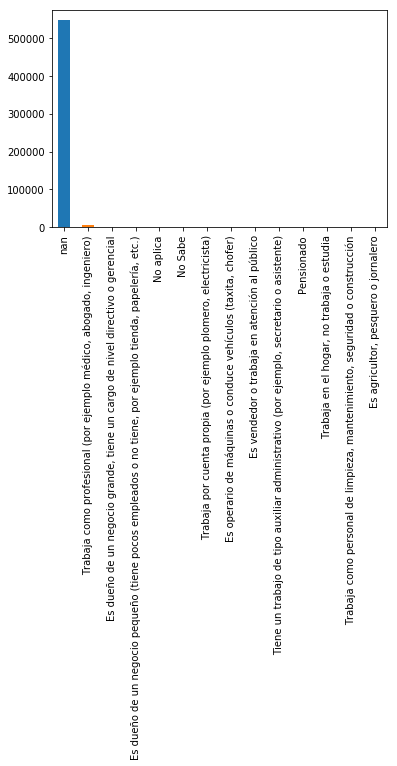

In [16]:
plt.figure()

icfes['FAMI_TRABAJOLABOR_PADRE'].value_counts(dropna=False).plot.bar()

In [ ]:
icfes.to_csv("./data/ICFES/icfes_preprocessing.csv.gz", index=False, encoding="utf-8", compression='gzip')